We've uploaded the training files at different sampling rates on our google drive. Now, we download the files to our virtual machine.

In [0]:
!pip install -U -q PyDrive


In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

Code credits for this cell [StackOverflow](https://stackoverflow.com/questions/48735600/file-download-from-google-drive-to-colaboratory)

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

def getFile(file_name, target_id):

  # 1. Authenticate and create the PyDrive client.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  #2. Get the file
  downloaded = drive.CreateFile({'id':target_id}) # replace the id with id of file you want to access
  downloaded.GetContentFile(file_name)  
  print 'done downloading '+ file_name

We've chosen the sampling rates to [10, 5, 3] seconds per frame

In [0]:
def uploadFileToDrive(nameOfFile):
      auth.authenticate_user()
      gauth = GoogleAuth()
      gauth.credentials = GoogleCredentials.get_application_default()
      drive = GoogleDrive(gauth)
      file = drive.CreateFile()
      file.SetContentFile(nameOfFile)
      file.Upload()

In [6]:
files_X = ['X.npy','X_150.npy', 'X_test90.npy']
files_Y = ['Y.npy', 'Y_150.npy', 'Y_test90.npy']
files_X_key = ['12o7z-WQApfnwzY5p0FPD_6l-3bJAO__K','1TyZhuiEOELzKCZHDQ0V-WNwjA5mTRso_','1nxL8wPsGFdjMnX9_pYknehGVEtHbG9yR']
files_Y_key = ['1qQRT06MuaHA5rtfnmybq9MeirxC2wRpl','13yuJXoGs5odbYZ-OKmMUZHF31X1h4k0r','1VspWplkWEVHai8S_6jeIp8CclxJDWXxa']


people = ['Sadhguru', 'Raman', 'AtulKhatri', 'SaurabhPant', 'Shailendra', 'Sandeep', 'Noise']
keys_X = ['1KCKWjSMnJ4uAYn5A2xYEi3iPW9SNxeFB','15XRHeyHNg9dOdPZh5WJvqkV3qvkxRg71','1Jj9_Nh0Uo_Ki5hc0CSeyQqSpkWwYI8m_','1e21LhRMy6-7K-RvwP58WXIq2HRN6J9rq','12gsD7iHWcZHyGrp4gQ7He8HOQqvZd2-U','1mqWU_VhHiqfEs_4D_xdJdKv-E7GLbih4','1A1iHUmikf0D07NTK9WDN0C1B6oyAMcpt']
keys_Y = ['1By_68a3c_NaBXfKPrZVwsuXkmxsBpBm_','1hTXtGyV-jPwJSEW8OWZyhEloARtc7Q1I','1-ZwgvJQiIax2ZPEld38aM8fIj-AopMrQ','1eZ9dHNSUItFFEBMFyV2rrpGTnFDxgimy','1evLXedEH6UoJE8zPFaw7Wpx0TWdJIdW8','1eVzAbYZsi_PY86MPSAK00UOgVjy3HE3X','16v8TlsGICtPrcORQORnX6GsGffuZhEs2']
for i in range(0, len(people)):
  getFile(people[i]+'X.npy', keys_X[i])
  getFile(people[i]+'Y.npy', keys_Y[i])

done downloading SadhguruX.npy
done downloading SadhguruY.npy
done downloading RamanX.npy
done downloading RamanY.npy
done downloading AtulKhatriX.npy
done downloading AtulKhatriY.npy
done downloading SaurabhPantX.npy
done downloading SaurabhPantY.npy
done downloading ShailendraX.npy
done downloading ShailendraY.npy
done downloading SandeepX.npy
done downloading SandeepY.npy
done downloading NoiseX.npy
done downloading NoiseY.npy


To show images on iPython Notebook

In [0]:
import cv2
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from cStringIO import StringIO
import IPython.display
from tempfile import TemporaryFile
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [8]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import cv2
from tempfile import TemporaryFile

Using TensorFlow backend.


In [0]:
train_X = np.load(people[0]+'X.npy')
train_Y = np.load(people[0]+'Y.npy')
for i in range(1, len(people)-1):
  train_X = np.concatenate((train_X, np.load(people[i]+'X.npy')), axis=0)
  train_Y = np.concatenate((train_Y, np.load(people[i]+'Y.npy')), axis=0)
  
noise_X = np.load(people[6]+'X.npy')
noise_Y = np.load(people[6]+'Y.npy')
noise_X = noise_X.astype(np.float32)/255.0
noise_Y = noise_Y.astype(np.float32)/255.0
train_X = np.concatenate((train_X, noise_X), axis=0)
del noise_X
train_Y = np.concatenate((train_Y, noise_Y), axis=0)
del noise_Y

In [0]:
from sklearn.utils import shuffle
train_X, train_Y = shuffle(train_X, train_Y, random_state=0)

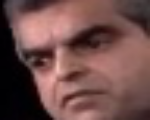

In [11]:
showarray(train_X[488]*255.0)

Code credits for building the LeNet [PyImage Search](https://www.pyimagesearch.com/2017/12/11/image-classification-with-keras-and-deep-learning/)

In [0]:
def LeNetModel(height=120, width=150, depth=3, nClasses=7):
	# initialize the model
	model = Sequential()
	inputShape = (height, width, depth)

	# if we are using "channels first", update the input shape
	if K.image_data_format() == "channels_first":
		inputShape = (depth, height, width)

		# first set of CONV => RELU => POOL layers
	model.add(Conv2D(20, (5, 5), padding="same",
		input_shape=inputShape))
	model.add(Activation("relu"))
	model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    		# first set of CONV => RELU => POOL layers
	model.add(Conv2D(20, (5, 5), padding="same",
		input_shape=inputShape))
	model.add(Activation("relu"))
	model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# first (and only) set of FC => RELU layers
	model.add(Flatten())
	model.add(Dense(500))
	model.add(Activation("relu"))

	# softmax classifier
	model.add(Dense(nClasses))
	model.add(Activation("softmax"))

	# return the constructed network architecture
	return model

We've used Keras Pre-trained VGG16 network on ImageNet. Source can be found [here](https://keras.io/applications/#vgg16)

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.optimizers import Adam

In [0]:
def VGG16Net():
  # create the base pre-trained model
  base_model = VGG16(weights='imagenet', include_top=False)
  
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  # let's add a fully-connected layer
  x = Dense(1024, activation='relu')(x)
  # and a logistic layer -- let's say we have 7 classes
  predictions = Dense(7, activation='softmax')(x)

  

  for layer in base_model.layers:
      layer.trainable = False
  model_net = Model(inputs=base_model.input, outputs=predictions)
      
  return model_net

In [0]:
EPOCHS = 15
INIT_LR = 1e-3
BS = 32

In [0]:
model_net = VGG16Net()
# model_net = LeNetModel()
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model_net.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [0]:
def train(X, Y, model_net):
  (trainX, testX, trainY, testY) = train_test_split(X,Y, test_size=0.1, random_state=42)

  trainY = to_categorical(trainY, num_classes=7)
  testY = to_categorical(testY, num_classes=7)

  aug = ImageDataGenerator(rotation_range=0, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=False, fill_mode="nearest")


  H = model_net.fit_generator(aug.flow(trainX, trainY, batch_size=25),
    validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS, verbose=1)
  model_net.save('my_model-noisefree.h5')

In [18]:
from keras.models import load_model
from sklearn.utils import shuffle

train(train_X, train_Y, model_net)


Epoch 1/15
97/97 [==============================] - 19s 198ms/step - loss: 0.9510 - acc: 0.6979 - val_loss: 0.5224 - val_acc: 0.8362
Epoch 2/15
97/97 [==============================] - 16s 164ms/step - loss: 0.4437 - acc: 0.8581 - val_loss: 0.3790 - val_acc: 0.8678
Epoch 3/15
67/97 [===================>..........] - ETA: 4s - loss: 0.3143 - acc: 0.9104

97/97 [==============================] - 16s 165ms/step - loss: 0.3102 - acc: 0.9089 - val_loss: 0.3140 - val_acc: 0.8764
Epoch 4/15
97/97 [==============================] - 16s 164ms/step - loss: 0.2709 - acc: 0.9113 - val_loss: 0.2079 - val_acc: 0.9339
Epoch 5/15
97/97 [==============================] - 16s 163ms/step - loss: 0.1952 - acc: 0.9410 - val_loss: 0.1814 - val_acc: 0.9511
Epoch 6/15
93/97 [===========================>..] - ETA: 0s - loss: 0.1737 - acc: 0.9444

97/97 [==============================] - 16s 168ms/step - loss: 0.1760 - acc: 0.9430 - val_loss: 0.1551 - val_acc: 0.9569
Epoch 7/15
97/97 [==============================] - 16s 166ms/step - loss: 0.1560 - acc: 0.9522 - val_loss: 0.1286 - val_acc: 0.9655
Epoch 8/15
97/97 [==============================] - 16s 165ms/step - loss: 0.1363 - acc: 0.9604 - val_loss: 0.1358 - val_acc: 0.9569
Epoch 9/15
96/97 [============================>.] - ETA: 0s - loss: 0.1210 - acc: 0.9633

97/97 [==============================] - 16s 164ms/step - loss: 0.1201 - acc: 0.9637 - val_loss: 0.1207 - val_acc: 0.9655
Epoch 10/15
97/97 [==============================] - 17s 171ms/step - loss: 0.1112 - acc: 0.9699 - val_loss: 0.1403 - val_acc: 0.9511
Epoch 11/15
97/97 [==============================] - 16s 166ms/step - loss: 0.1219 - acc: 0.9592 - val_loss: 0.1372 - val_acc: 0.9626
Epoch 12/15
95/97 [============================>.] - ETA: 0s - loss: 0.0926 - acc: 0.9726

97/97 [==============================] - 16s 164ms/step - loss: 0.0918 - acc: 0.9728 - val_loss: 0.1187 - val_acc: 0.9626
Epoch 13/15
97/97 [==============================] - 16s 165ms/step - loss: 0.0886 - acc: 0.9699 - val_loss: 0.0909 - val_acc: 0.9713
Epoch 14/15
97/97 [==============================] - 16s 162ms/step - loss: 0.1488 - acc: 0.9479 - val_loss: 0.2020 - val_acc: 0.9397
Epoch 15/15
96/97 [============================>.] - ETA: 0s - loss: 0.0924 - acc: 0.9662

97/97 [==============================] - 16s 165ms/step - loss: 0.0930 - acc: 0.9654 - val_loss: 0.0790 - val_acc: 0.9770


In [0]:
uploadFileToDrive('my_model-noisefree.h5')

We test on our custom made test data

In [20]:
files_X_test = ['Xtestt90Sadhguru.npy', 'Xtestt90AtulKhatri.npy', 'Xtestt90Raman.npy', 'Xtestt90SaurabhPant.npy','Xtestt90Shailendra.npy','Xtestt90Sandeep.npy','Xtestt90Noise.npy']
files_X_test_key = ['1rVJ1IljmpFlMZcJnOn9YcA6SGYPd54Jz','14ibngnH9JrALnTgip2VGBND-6YLsqQVc','111ySr7TZIApFknYngUh4htTdbb-Jhxw_','1GIr9ic0WRCuYDEmEqjK7ZAJQGsrDqh80','1vkhPfRZjc-R5C7yK-iChiNJZzCFQSIF5','1jVKsnJ04u2f0wJo64CVG4aJMFoctdxaP','1usINbBpwtpxGzJw4-ib1DtiV80NIaR4-']
files_Y_test = ['Ytestt 90Sadhguru.npy', 'Ytestt 90AtulKhatri.npy', 'Ytestt 90Raman.npy', 'Ytestt 90SaurabhPant.npy','Ytestt 90Shailendra.npy','Ytestt 90Sandeep.npy','Ytestt 90Noise.npy']
files_Y_test_key = ['1sawbCmQAF2z4L6c7y3ixFGOC_ow2jpqx','1bJklSJ17izG7A6RK1oBrKrff4axX6a4L','1bvJTn2KsWEJpx6waHDqLZiZK8L53YYhg','1HHRpSY_8ACRFbpZJtCFqJiXr1s0cgZH6','1NZ1qWL2QqHR3pirWangWyXuPw3np_4BV','12uyk_qqAXSln32q-AQ6n7HUp4wgKJygm','1nhbxgiyXDhaMKthTxVYf9suEs6x92Bl0']

for i in range(0, len(files_X_test)):
  getFile(files_X_test[i], files_X_test_key[i])
  getFile(files_Y_test[i], files_Y_test_key[i])

done downloading Xtestt90Sadhguru.npy
done downloading Ytestt 90Sadhguru.npy
done downloading Xtestt90AtulKhatri.npy
done downloading Ytestt 90AtulKhatri.npy
done downloading Xtestt90Raman.npy
done downloading Ytestt 90Raman.npy
done downloading Xtestt90SaurabhPant.npy
done downloading Ytestt 90SaurabhPant.npy
done downloading Xtestt90Shailendra.npy
done downloading Ytestt 90Shailendra.npy
done downloading Xtestt90Sandeep.npy
done downloading Ytestt 90Sandeep.npy
done downloading Xtestt90Noise.npy
done downloading Ytestt 90Noise.npy


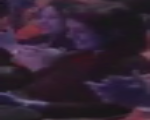

In [21]:
from keras.utils import to_categorical
X_test = np.load('Xtestt90Noise.npy')
Y_test = np.load('Ytestt 90Noise.npy')
Y_test = to_categorical(Y_test, num_classes=7)
showarray(X_test[8,:,:])
X_test = X_test.astype(np.float32)/255.0

In [22]:
model_net.evaluate(X_test, Y_test)

1719/1719 [==============================] - 9s 5ms/step


[15.579281793630976, 0.0]